In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("0109.csv")
df.head()

,Unnamed: 0,strain,number,dots,cells,0,1,2,3,4
0,1,yRL255,1,16,70,54,13,3,0,0
1,2,yRL255,1,10,68,58,10,0,0,0
2,3,yRL255,1,11,71,60,11,0,0,0
3,4,yRL255,1,11,64,53,11,0,0,0
4,5,yRL255,2,4,59,55,4,0,0,0


In [3]:
df['per_1'] = df['1'] / df['dots'] * 100
df['per_2'] = df['2'] / df['dots'] * 100
df['per_3'] = df['3'] / df['dots'] * 100

In [4]:
df_number = df.groupby(["strain", "number"], as_index=False).mean()
df_number = df_number[df_number['strain']=='yRL255']
SE_mean = df_number.groupby('strain')[['per_1', 'per_2', 'per_3']].mean().values
df_number

,strain,number,Unnamed: 0,dots,cells,0,1,2,3,4,per_1,per_2,per_3
0,yRL255,1,2.5,12.0,68.25,56.25,11.25,0.75,0.0,0.0,95.312500,4.687500,0.0
1,yRL255,2,6.5,5.0,46.00,41.00,5.00,0.00,0.0,0.0,100.000000,0.000000,0.0
2,yRL255,3,10.5,8.0,44.00,36.00,7.25,0.75,0.0,0.0,92.261905,7.738095,0.0


In [5]:
SE_mean[0]

array([95.85813492,  4.14186508,  0.        ])

In [6]:
SE_sem = df_number.groupby('strain')[['per_1', 'per_2', 'per_3']].std().values / np.sqrt(3)
SE_sem

array([[2.25039386, 2.25039386, 0.        ]])

In [7]:
df_number = df_number[['per_1', 'per_2', 'per_3']]
df_number

,per_1,per_2,per_3
0,95.312500,4.687500,0.0
1,100.000000,0.000000,0.0
2,92.261905,7.738095,0.0


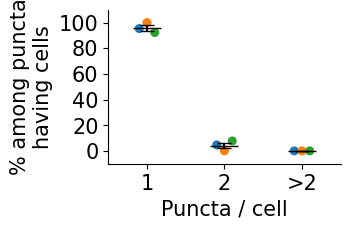

In [8]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fontsize = 15

fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
for idx, column in enumerate(df_number.columns):
    y = df_number[column].values
    x = [idx + 0.1*x for x in range(-1, 2)]
    ax.scatter(x, y, s=30, c=colors)

ax.errorbar(x=list(range(len(df_number))), y=SE_mean[0], yerr=SE_sem,
            capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(-0.5, 2.5)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["1", "2", ">2"], fontsize=fontsize)
ax.set_xlabel("Puncta / cell", fontsize=fontsize)

ax.set_ylim(-10, 110)
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_yticklabels(["0", "20", "40", "60", "80", "100"], fontsize=fontsize)
ax.set_ylabel("% among puncta\nhaving cells", fontsize=fontsize)

fig.savefig("output.jpg", bbox_inches="tight")
plt.show()